In [1]:
#!pip install tabulate

In [2]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from io import BytesIO
from PIL import Image
%matplotlib inline

In [3]:
pk = pd.read_csv('DatasetsML/poke.csv')
pk.head(3)

,Name,Type1,HP,Attack,Defense,SpeedAttack
0,Charmander,Fire,39,52,43,60
1,Charmeleon,Fire,58,64,58,80
2,Charizard,Fire,78,84,78,109


In [4]:
predictVar = ["HP","Attack","Defense", "SpeedAttack"]
x = pk[predictVar]
y = pk.Type1
#y = pk.Type1.loc == "Fire" and "Water" and "Grass"

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)

In [6]:
lr = LogisticRegression(solver='lbfgs', max_iter=200)
lr.fit(x_train, y_train)
y_pre = lr.predict(x_test)

In [7]:
y_pre

array(['Water', 'Water', 'Water', 'Water', 'Water', 'Water', 'Water',
       'Water', 'Water', 'Water', 'Water', 'Water', 'Water', 'Water',
       'Fire', 'Water', 'Fire', 'Water', 'Water', 'Water', 'Water',
       'Water', 'Water', 'Water', 'Water', 'Water', 'Water', 'Water',
       'Water', 'Water', 'Water', 'Water', 'Water', 'Water', 'Water',
       'Fire', 'Water', 'Water', 'Water', 'Water', 'Water'], dtype=object)

In [8]:
x_test.head(3)

,HP,Attack,Defense,SpeedAttack
146,100,60,70,85
89,60,60,40,65
106,44,58,44,58


In [9]:
metrics.accuracy_score(y_test, y_pre)

0.7073170731707317

[[ 2 11]
 [ 1 27]]


0.7073170731707317

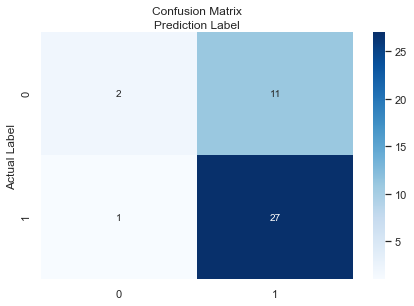

In [10]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pre)
print(cnf_matrix)

class_names = [0,1]
fig, ax = plt.subplots()
ticks_marks = np.arange(len(class_names))
plt.xticks(ticks_marks, class_names)
plt.yticks(ticks_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues', fmt='g') # fmt='g' annot shows normal numbers 
ax.xaxis.set_label_position('top')
ax.autoscale(enable=True) # To fix scale 
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Prediction Label')

metrics.accuracy_score(y_test, y_pre)

In [11]:
def plot_data(X, y):   #plot our data (X,y)
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  color=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

In [12]:
def plot_decision_region(X, pred_fun):      # Function to visualize the decision surface of our algorithm.
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")
    
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

In [13]:
def list_cm(cm,classes):     #function to generate the confusion matrix in a more visual way
    if len(cm)==2:
        row_0 =['','Value','True']
        row_1 =['-',classes[0],classes[1]]
        row_2 =[classes[0],cm[0,0],cm[1,0]]
        row_3 =[classes[1],cm[0,1],cm[1,1]]
        table = zip(row_0,row_1, row_2, row_3)
        headers = ['', '', 'Value', 'Predicted']  
        return print(tabulate(table, headers=headers, floatfmt=".4f"))
    else:
        row_0 =['','Value','True','']
        row_1 =['-',classes[0],classes[1],classes[2]]
        row_2 =[classes[0],cm[0,0],cm[1,0],cm[2,0]]
        row_3 =[classes[1],cm[0,1],cm[1,1],cm[2,1]]
        row_4 =[classes[2],cm[0,2],cm[1,2],cm[2,2]]
        table = zip(row_0,row_1, row_2, row_3, row_4)
        headers = ['', '', 'Value', 'Predicted', '']  
        return print(tabulate(table, headers=headers, floatfmt=".4f"))   

In [14]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)
print(X.shape)
print(y.shape)
y

(100, 2)
(100,)


array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

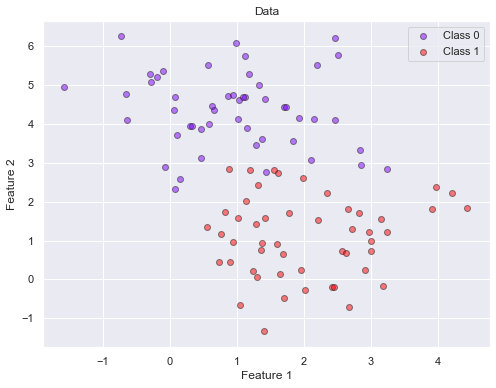

In [15]:
pl.figure(figsize=(8, 6))
pl.xlabel('Feature 1')
pl.ylabel('Feature 2')
plot_data(X, y)

In [16]:
classifier = LogisticRegression(solver='lbfgs', max_iter=200)
cl2 = LogisticRegression(C=1.5)

# lr = LogisticRegression(solver='lbfgs', max_iter=200)
# lr.fit(x_train, y_train)
# y_pre = lr.predict(x_test)

In [17]:
classifier.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
classifier.predict(X)

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [19]:
classifier.score(X, y)

0.94

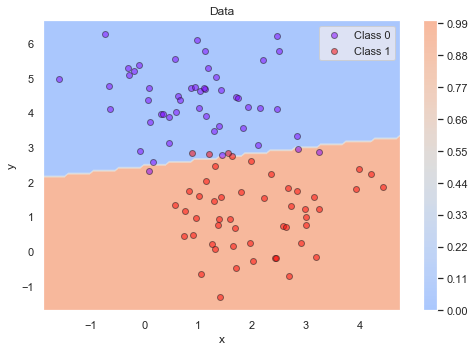

In [20]:
pl.figure(figsize = (8,16/3))    
plot_decision_region(X, gen_pred_fun(classifier))
plot_data(X, y)

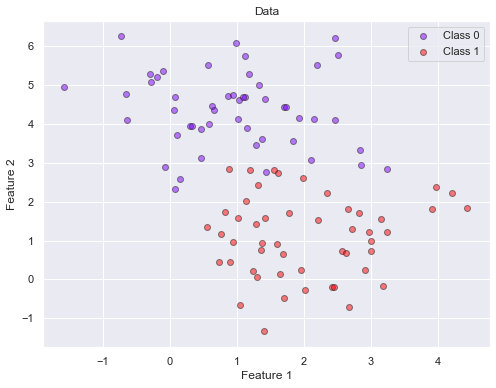

In [21]:
pl.figure(figsize=(8, 6))
pl.xlabel('Feature 1')
pl.ylabel('Feature 2')
plot_data(X, y)

In [22]:
from sklearn.naive_bayes import GaussianNB
classifier2 = GaussianNB()
classifier2.fit(X, y);

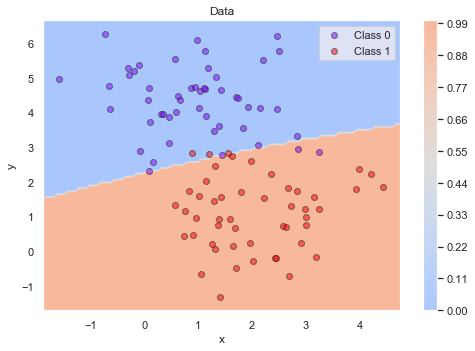

In [23]:
pl.figure(figsize = (8,16/3))    
plot_decision_region(X, gen_pred_fun(classifier2))
plot_data(X, y)

In [24]:
classifier.score(X,y)

0.94

In [25]:
yprob = classifier2.predict_proba(X)
yprob[-8:].round(2)

array([[0.11, 0.89],
       [0.  , 1.  ],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.06, 0.94]])

In [26]:
classifier2.score(X, y)

0.95

In [27]:
pokes1 = x.iloc[0:4]
print(pokes1.shape)
pokes1

(4, 4)


,HP,Attack,Defense,SpeedAttack
0,39,52,43,60
1,58,64,58,80
2,78,84,78,109
3,78,130,111,130


In [28]:
lr.predict(pokes1)

array(['Water', 'Water', 'Water', 'Fire'], dtype=object)

In [29]:
pokes1['Attack'] = pokes1['Attack'] + 10
pokes1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,HP,Attack,Defense,SpeedAttack
0,39,62,43,60
1,58,74,58,80
2,78,94,78,109
3,78,140,111,130


In [30]:
lr.predict(pokes1)

array(['Water', 'Water', 'Water', 'Fire'], dtype=object)

In [31]:
pokes2 = x.iloc[4:8]
print(pokes2.shape)
pokes2

(4, 4)


,HP,Attack,Defense,SpeedAttack
4,78,104,78,159
5,44,48,65,50
6,59,63,80,65
7,79,83,100,85


In [32]:
lr.predict(pokes2)

array(['Fire', 'Water', 'Water', 'Water'], dtype=object)

In [33]:
pokes2['SpeedAttack'] = pokes2['SpeedAttack'] + 80
pokes2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,HP,Attack,Defense,SpeedAttack
4,78,104,78,239
5,44,48,65,130
6,59,63,80,145
7,79,83,100,165


In [34]:
lr.predict(pokes2)

array(['Fire', 'Fire', 'Fire', 'Fire'], dtype=object)

## Can we predict the type of promotion?

In [35]:
promo = pd.read_csv('DatasetsML/MarketingRawData-Promotions.csv')

In [36]:
promo.head()

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46,34,11,11,2020,Monday,707,465,651.375,No Promo
1,10/11/2020,46,34,11,11,2020,Tuesday,1455,10386,1298.250,Promotion Red
2,11/11/2020,46,34,11,11,2020,Wednesday,1520,12475,1559.375,Promotion Blue
3,12/11/2020,46,34,11,11,2020,Thursday,1726,11712,1801.750,No Promo
4,13/11/2020,46,34,11,11,2020,Friday,2134,10000,2614.500,No Promo


In [37]:
promo.shape

(182, 11)

In [38]:
# Another way to see the shape, instead of promo.shape:
n_samples, n_features = promo.shape
print('Number of samples:', n_samples) # rows
print('Number of features:', n_features) # columns

Number of samples: 182
Number of features: 11


In [39]:
predictingVars = ["Month","Visitors","Revenue","Marketing Spend"]
x = promo[predictingVars]
y = promo.Promo
print(predictingVars)

['Month', 'Visitors', 'Revenue', 'Marketing Spend']


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [41]:
lr = LogisticRegression(solver='lbfgs', max_iter=200)
lr.fit(x_train, y_train)
y_pre = lr.predict(x_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [42]:
y_pre

array(['Promotion Red', 'Promotion Blue', 'Promotion Red',
       'Promotion Red', 'No Promo', 'No Promo', 'No Promo', 'No Promo',
       'Promotion Blue', 'Promotion Blue', 'Promotion Blue',
       'Promotion Red', 'No Promo', 'Promotion Blue', 'Promotion Blue',
       'No Promo', 'No Promo', 'Promotion Blue', 'No Promo',
       'Promotion Blue', 'No Promo', 'Promotion Red', 'No Promo',
       'Promotion Blue', 'No Promo', 'No Promo', 'No Promo', 'No Promo',
       'Promotion Red', 'Promotion Red', 'Promotion Red', 'No Promo',
       'No Promo', 'No Promo', 'Promotion Red', 'No Promo',
       'Promotion Blue', 'Promotion Blue', 'No Promo', 'Promotion Blue',
       'No Promo', 'Promotion Blue', 'No Promo', 'No Promo',
       'Promotion Red', 'No Promo'], dtype=object)

In [43]:
x_test.head(3)

,Month,Visitors,Revenue,Marketing Spend
94,2,826,5519,818.250000
18,11,1671,14760,1845.000000
33,12,1167,9097,1010.777778


In [44]:
list1 = []
for i in promo.Promo:
    if i in list1:
        pass
    else:
        list1.append(i)
print(list1)

['No Promo', 'Promotion Red', 'Promotion Blue']


In [45]:
promotions = np.asarray(list1)
print(promotions)
print(type(promotions))

['No Promo' 'Promotion Red' 'Promotion Blue']
<class 'numpy.ndarray'>


In [46]:
list2 = []
for i in promo.Promo:
    if i == "No Promo":
        list2.append(0)
    if i == "Promotion Red":
        list2.append(1)
    if i == "Promotion Blue":
        list2.append(2)
print(list2)

[0, 1, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0]


In [47]:
promotionsData = np.asarray(list2)
print(promotionsData)
print(type(promotionsData))

[0 1 2 0 0 2 2 0 2 0 0 1 0 1 2 2 2 1 1 1 1 0 0 1 0 2 0 1 1 0 0 0 0 2 2 1 1
 0 0 2 1 0 2 1 2 0 2 2 2 0 1 1 0 2 2 2 0 1 1 0 0 2 1 0 1 0 1 2 2 1 1 1 0 0
 2 0 1 2 0 0 0 0 0 0 2 2 2 0 1 1 0 0 2 2 0 0 0 1 1 0 0 2 0 0 0 0 1 2 2 2 1
 0 2 0 1 2 2 2 0 0 0 1 2 0 2 2 0 0 0 1 1 1 1 1 2 1 1 2 0 2 1 0 1 2 0 1 0 1
 1 1 1 2 0 2 1 2 2 0 0 0 2 1 0 0 2 0 1 2 0 1 2 2 2 0 1 1 0 0 1 0 0 0]
<class 'numpy.ndarray'>


In [48]:
print(promotions.shape)
print(promotionsData.shape)

(3,)
(182,)


In [49]:
print(list(zip(promotions, np.bincount(promotionsData))))

[('No Promo', 74), ('Promotion Red', 54), ('Promotion Blue', 54)]


In [50]:
metrics.accuracy_score(y_test, y_pre)

0.6956521739130435

In [51]:
promo.head(5)

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46,34,11,11,2020,Monday,707,465,651.375,No Promo
1,10/11/2020,46,34,11,11,2020,Tuesday,1455,10386,1298.250,Promotion Red
2,11/11/2020,46,34,11,11,2020,Wednesday,1520,12475,1559.375,Promotion Blue
3,12/11/2020,46,34,11,11,2020,Thursday,1726,11712,1801.750,No Promo
4,13/11/2020,46,34,11,11,2020,Friday,2134,10000,2614.500,No Promo


In [52]:
promo.shape

(182, 11)

In [ ]:
eval1 = promo[["Revenue","Marketing Spend"]]
print(eval1)

In [ ]:
#X = promo[:,[7, 8]] # Column 8: Revenue, Column 9: Marketing Spend
# TypeError: '(slice(None, None, None), [7, 8])' is an invalid key

X = promo[eval1]
y = promotionsData

X = X[(y == 1) | (y == 2)] # We filter class 1 and 2 that correspond to Red and Blue.
y = y[(y == 1) | (y == 2)] 

y = y - 1 # So that the classes are between 0 and 1

In [ ]:
X.shape

In [ ]:
classifier = LogisticRegression()
classifier.fit(X, y)
predictions = classifier.predict(X)

print('Number of instances to predict: {}'.format(y.shape[0]))
print('Truth values: {}'.format(y))
print('Predicted values: {}'.format(predictions))

In [ ]:
prediction = classifier.predict(X)
np.mean(prediction == y)

In [ ]:
classifier.score(X, y)